In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Tetrahymena_Data/Tetrahymena_SJB_90', index_col='Unnamed: 0')

In [3]:
df.shape

(1995, 448)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('Dependent', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_feats = scaler.transform(df.drop('Dependent', axis=1))

In [8]:
df_feats = pd.DataFrame(scaled_feats, columns=df.columns[1:])

In [9]:
df_feats.head()

nAcid        nN        nS        nX     ATS0m     ATS2m     ATS3m  \
0 -0.209531 -0.714601 -0.256401  4.100852  0.686096  3.975024 -1.217895   
1 -0.209531  0.602986 -0.256401  0.655653  1.310228 -0.406501  0.057718   
2 -0.209531 -0.714601 -0.256401 -0.492747 -0.752538 -1.884927 -1.216412   
3 -0.209531  1.920572 -0.256401 -0.492747 -0.634112 -1.560036 -1.080855   
4 -0.209531  1.920572  3.423597 -0.492747 -0.401157 -1.037483 -1.127506   

      ATS4m     ATS5m     ATS6m  ...     VR2_D     VR3_D   TopoPSA        MW  \
0 -0.820034 -0.944435 -0.740569  ...  4.651234  0.361676 -1.650072  0.017058   
1 -0.820034 -0.944435 -0.740569  ... -0.434993 -1.005337  0.402123 -0.250284   
2 -0.820034 -0.944435 -0.740569  ... -0.435004 -1.261489 -0.687719 -2.457414   
3 -0.805639 -0.944435 -0.740569  ... -0.434995 -1.092426  0.972019 -1.879184   
4 -0.818328 -0.944435 -0.740569  ...  4.333344  0.009256  2.352041 -1.549310   

        AMW    WTPT-3    WTPT-4     WPATH      WPOL     XLogP  
0  6.175410  0.675649 -1.187485 -0.990363 -1.779125  0.382170  
1  3.217247  0.880535  0.343143 -0.975374 -1.434192 -0.854076  
2 -0.859349 -1.101893 -0.525750 -1.102782 -1.779125 -1.764188  
3 -0.250671  0.213991 -0.422962 -1.035330 -1.606658 -2.418370  
4  0.310467  0.099738 -1.187485 -1.042825 -1.779125 -1.956932  

[5 rows x 447 columns]

In [10]:
X = df_feats
y = df['Dependent']

In [11]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

In [58]:
knn = KNeighborsRegressor()

Default Parameters 

KFold R2:  0.660311155068315
KFold MAE:  0.44133413567839197
KFold MSE:  0.3676150012361809
KFold RMSE:  0.6063126266507906


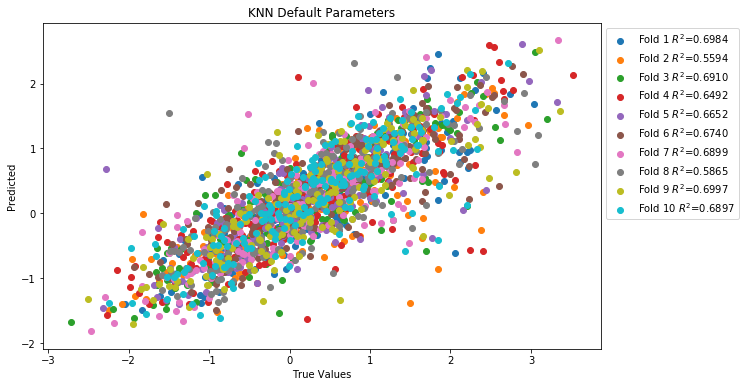

In [59]:
r2_model, mae_model, mse_model, train_r2_model= list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('KNN Default Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = knn.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_model.append(r2_score(y_test, model.predict(X_test)))
    mae_model.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_model.append(r2_score(y_train, model.predict(X_train)))

    
r2_default = np.mean(r2_model)
mae_default = np.mean(mae_model)
mse_default = np.mean(mse_model)
rmse_default = np.sqrt(mse_default)
train_r2_default = np.mean(train_r2_model)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_Default_Parameters.png', bbox_inches='tight')

print('Default Parameters', '\n')
print('KFold R2: ', r2_default)
print('KFold MAE: ', mae_default)
print('KFold MSE: ', mse_default)
print('KFold RMSE: ', rmse_default)

In [62]:
print('R2 Train', train_r2_default)

R2 Train 0.7824674201135192


In [47]:
n_neighbors = list(range(1,21))
train_r2_nn, test_r2_nn, mse_nn = list(), list(), list()

for i in n_neighbors:
    
    knn = KNeighborsRegressor(n_neighbors=i)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = knn.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_nn.append(np.mean(train_r2_model))
    test_r2_nn.append(np.mean(test_r2_model))
    mse_nn.append(np.mean(mse_model)) 
    
print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_nn))
print('n_neighbors: ', n_neighbors[test_r2_nn.index(max(test_r2_nn))])
print('Optimal R2 Train', train_r2_nn[test_r2_nn.index(max(test_r2_nn))])

Default R2:  0.660311155068315
Optimal R2 0.661808904825934
n_neighbors:  6
Optimal R2 Train 0.7669489328284427


In [60]:
print('MSE: ', mse_nn[test_r2_nn.index(max(test_r2_nn))])

MSE:  0.36655171596873254


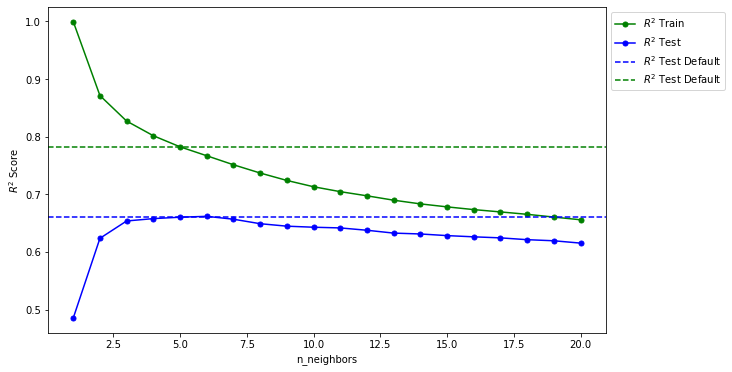

In [48]:
plt.figure(figsize=(10,6))
plt.plot(n_neighbors, train_r2_nn, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(n_neighbors, test_r2_nn, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Test Default')
plt.xlabel('n_neighbors')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_n_neighbors_R2.png', bbox_inches='tight')

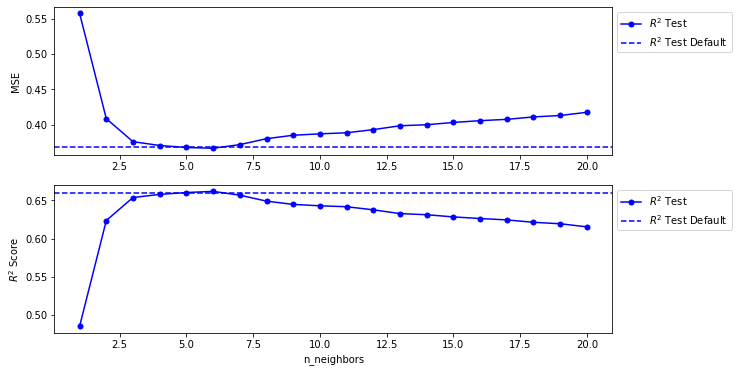

In [49]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(n_neighbors, test_r2_nn, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(n_neighbors, mse_nn, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_n_neighbors_MSE_R2.png', bbox_inches='tight')

In [50]:
p = list(range(1,6))
train_r2_p, test_r2_p, mse_p = list(), list(), list()

for i in p:
    
    knn = KNeighborsRegressor(p=i)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = knn.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_p.append(np.mean(train_r2_model))
    test_r2_p.append(np.mean(test_r2_model))
    mse_p.append(np.mean(mse_model))    

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_p))
print('p: ', p[test_r2_p.index(max(test_r2_p))])
print('Optimal R2 Train', train_r2_p[test_r2_p.index(max(test_r2_p))])

Default R2:  0.660311155068315
Optimal R2 0.6939677501969383
p:  1
Optimal R2 Train 0.8025118198526784


In [61]:
print('MSE: ', mse_p[test_r2_p.index(max(test_r2_p))])

MSE:  0.3316750091155779


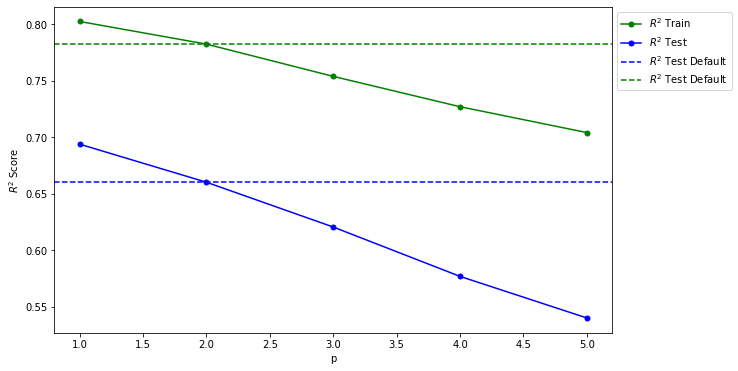

In [51]:
plt.figure(figsize=(10,6))
plt.plot(p, train_r2_p, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(p, test_r2_p, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Test Default')
plt.xlabel('p')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_p_R2.png', bbox_inches='tight')

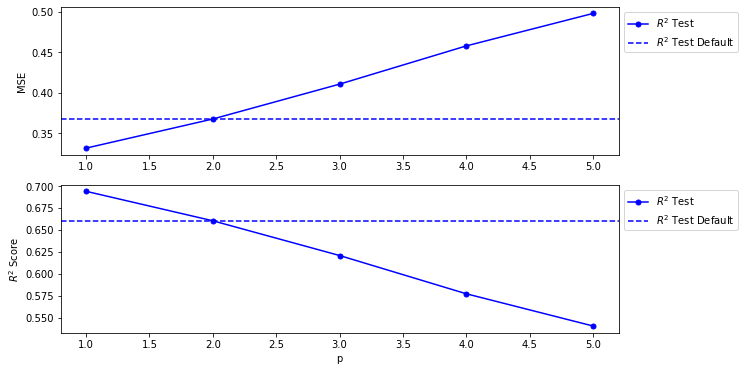

In [52]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(p, test_r2_p, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('p')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(p, mse_p, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_p_MSE_R2.png', bbox_inches='tight')

Manual Parameters 

KFold R2 Test:  0.6936148705528424
KFold R2 Train:  0.7868125295355431
KFold MAE:  0.4162983793969849
KFold MSE:  0.3317661251046901
KFold RMSE:  0.5759914279784814


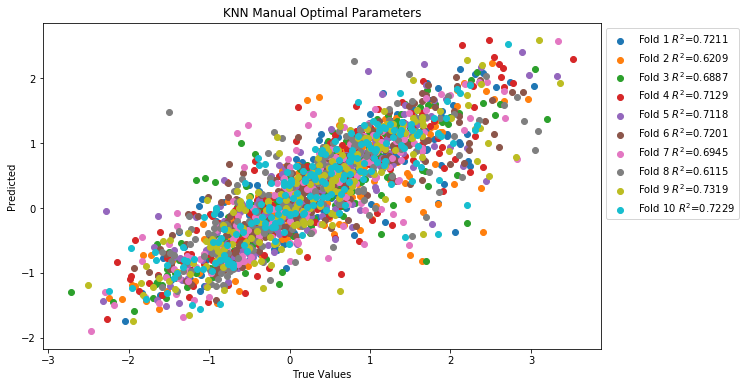

In [54]:
knn_mopt = KNeighborsRegressor(n_neighbors=6, p=1)

r2_mopt, mae_mopt, mse_mopt, train_r2_mopt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('KNN Manual Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = knn_mopt.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_mopt.append(r2_score(y_test, model.predict(X_test)))
    mae_mopt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_mopt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_mopt.append(r2_score(y_train, model.predict(X_train)))
    
r2_manual = np.mean(r2_mopt)
mae_manual = np.mean(mae_mopt)
mse_manual = np.mean(mse_mopt)
rmse_manual = np.sqrt(mse_manual)
train_r2_manual = np.mean(train_r2_mopt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_Manual_Parameters.png', bbox_inches='tight')

print('Manual Parameters', '\n')
print('KFold R2 Test: ', r2_manual)
print('KFold R2 Train: ', train_r2_manual)
print('KFold MAE: ', mae_manual)
print('KFold MSE: ', mse_manual)
print('KFold RMSE: ', rmse_manual)

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
n_neighbors = list(range(1,16))
p = [1, 2, 3]

param_grid = {'n_neighbors':n_neighbors, 'p':p}

In [35]:
cv = KFold(n_splits=10, shuffle=True, random_state=101)
knn_gs = KNeighborsRegressor()

random_grid = RandomizedSearchCV(estimator=knn_gs, 
                                 param_distributions=param_grid, 
                                 cv=cv, 
                                 n_iter=50,
                                 scoring='r2',
                                 verbose=3,
                                 return_train_score=True,
                                 random_state=42)

In [36]:
random_grid.fit(X, y)

/Users/sambelfield/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] p=1, n_neighbors=1 ..............................................
[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.677), total=   0.3s
[CV] p=1, n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.498), total=   0.2s
[CV] p=1, n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.556), total=   0.2s
[CV] p=1, n_neighbors=1 ..............................................
[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.495), total=   0.2s
[CV] p=1, n_neighbors=1 ..............................................
[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.545), total=   0.2s
[CV] p=1, n_neighbors=1 ..............................................
[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.604), total=   0.2s
[CV] p=1, n_neighbors=1 ..............................................
[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.508), total=   0.2s
[CV] p=1, n_neighbors=1 ..............................................
[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.461), total=   0.3s
[CV] p=1, n_neighbors=1 ..............................................
[CV]  p=1, n_neighbors=1, score=(train=1.000, test=0.610), total=   0.3s
[CV] p=1, n_neighbors=1 .......................................

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 68.2min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15],
                                        'p': [1, 2, 3]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='r2', verbose=3)

In [37]:
random_grid.best_params_

{'p': 1, 'n_neighbors': 3}

GridSearch Parameters 

KFold Test R2:  0.6961884174609864
KFold Train R2:  0.8453746258616042
KFold MAE:  0.40986435510887775
KFold MSE:  0.3278082575656058
KFold RMSE:  0.572545419652979


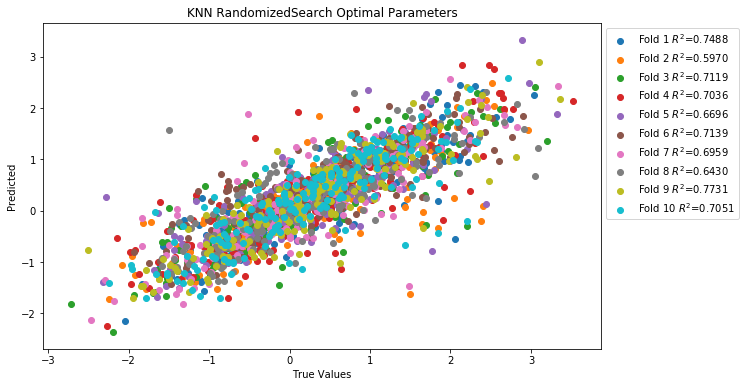

In [55]:
knn_gsopt = random_grid.best_estimator_
r2_gsopt, mae_gsopt, mse_gsopt, train_r2_gsopt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('KNN RandomizedSearch Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = knn_gsopt.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_gsopt.append(r2_score(y_test, model.predict(X_test)))
    mae_gsopt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_gsopt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_gsopt.append(r2_score(y_train, model.predict(X_train)))
    
r2_grid = np.mean(r2_gsopt)
mae_grid = np.mean(mae_gsopt)
mse_grid = np.mean(mse_gsopt)
rmse_grid = np.sqrt(mse_grid)
train_r2_grid = np.mean(train_r2_gsopt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_Random_Parameters.png', bbox_inches='tight')

print('GridSearch Parameters', '\n')
print('KFold Test R2: ', r2_grid)
print('KFold Train R2: ', train_r2_grid)
print('KFold MAE: ', mae_grid)
print('KFold MSE: ', mse_grid)
print('KFold RMSE: ', rmse_grid)

In [42]:
gs_cv = pd.DataFrame(random_grid.cv_results_)

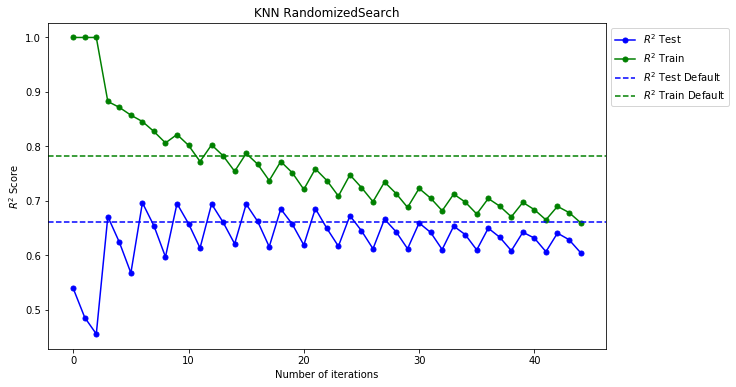

In [56]:
plt.figure(figsize=(10,6))
plt.plot(gs_cv['mean_test_score'], color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.plot(gs_cv['mean_train_score'], color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5, label='$R^2$ Train')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.ylabel('$R^2$ Score')
plt.xlabel('Number of iterations')
plt.title('KNN RandomizedSearch')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_RandomizedSearchCV.png', bbox_inches='tight')

In [63]:
import optuna

In [66]:
def objective(trial):
    
    knn_p = trial.suggest_int('p', 1, 3)
    knn_nn = trial.suggest_int('n_neighbors', 1, 15)

    knn = KNeighborsRegressor(p=knn_p, n_neighbors=knn_nn)

    mse_model = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = knn.fit(X_train, y_train)
        
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    return np.mean(mse_model)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-06-16 09:06:57,920] A new study created in memory with name: no-name-e2c31f7d-d111-49d2-b105-9ca8b6908f2d
[I 2021-06-16 09:07:00,672] Trial 0 finished with value: 0.3884740223472736 and parameters: {'p': 2, 'n_neighbors': 11}. Best is trial 0 with value: 0.3884740223472736.
[I 2021-06-16 09:07:24,679] Trial 1 finished with value: 0.4165066683766053 and parameters: {'p': 3, 'n_neighbors': 6}. Best is trial 0 with value: 0.3884740223472736.
[I 2021-06-16 09:07:27,188] Trial 2 finished with value: 0.3278082575656058 and parameters: {'p': 1, 'n_neighbors': 3}. Best is trial 2 with value: 0.3278082575656058.
[I 2021-06-16 09:07:51,995] Trial 3 finished with value: 0.4208787195728643 and parameters: {'p': 3, 'n_neighbors': 10}. Best is trial 2 with value: 0.3278082575656058.
[I 2021-06-16 09:07:54,373] Trial 4 finished with value: 0.40837413354271357 and parameters: {'p': 2, 'n_neighbors': 2}. Best is trial 2 with value: 0.3278082575656058.
[I 2021-06-16 09:08:19,952] Trial 5 finishe

'p': 1, 'n_neighbors': 3

In [67]:
knn_optuna = KNeighborsRegressor(p=1, n_neighbors=3)

Optuna Parameters 

KFold R2:  0.6961884174609864
KFold Train R2:  0.8453746258616042
KFold MAE:  0.40986435510887775
KFold MSE:  0.3278082575656058
KFold RMSE:  0.572545419652979


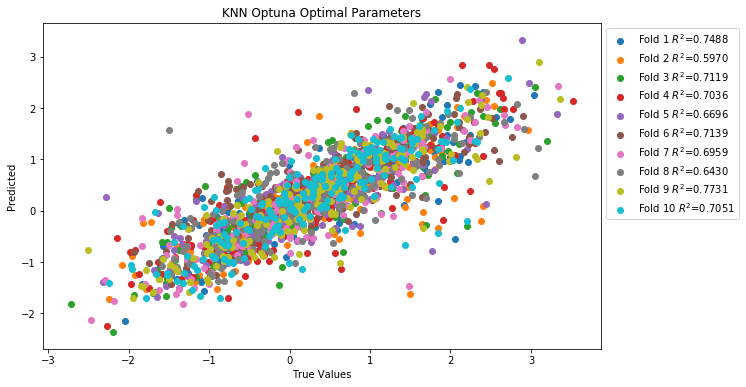

In [68]:
r2_opt, mae_opt, mse_opt, train_r2_opt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('KNN Optuna Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = knn_optuna.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_opt.append(r2_score(y_test, model.predict(X_test)))
    mae_opt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_opt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_opt.append(r2_score(y_train, model.predict(X_train)))
    
r2_optuna = np.mean(r2_opt)
mae_optuna = np.mean(mae_opt)
mse_optuna = np.mean(mse_opt)
rmse_optuna = np.sqrt(mse_optuna)
train_r2_optuna = np.mean(train_r2_opt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/KNN_Optuna.png', bbox_inches='tight')

print('Optuna Parameters', '\n')
print('KFold R2: ', r2_optuna)
print('KFold Train R2: ', train_r2_optuna)
print('KFold MAE: ', mae_optuna)
print('KFold MSE: ', mse_optuna)
print('KFold RMSE: ', rmse_optuna)

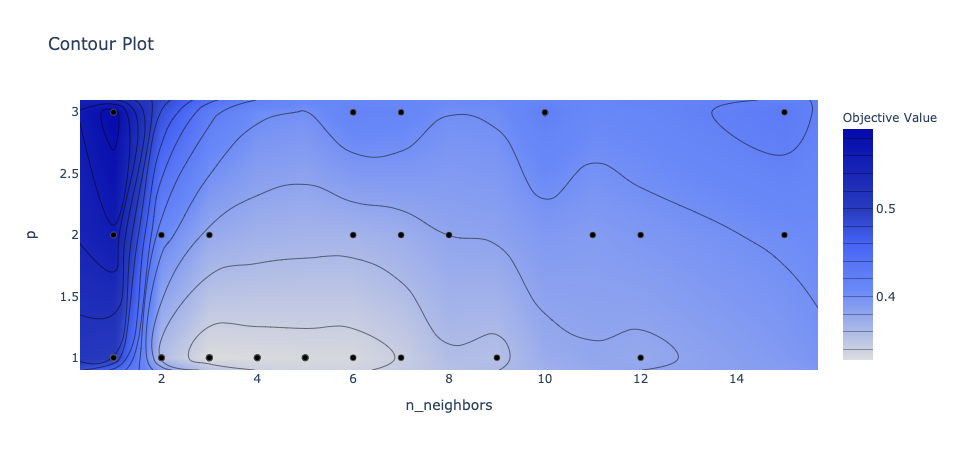

In [69]:
optuna.visualization.plot_contour(study)

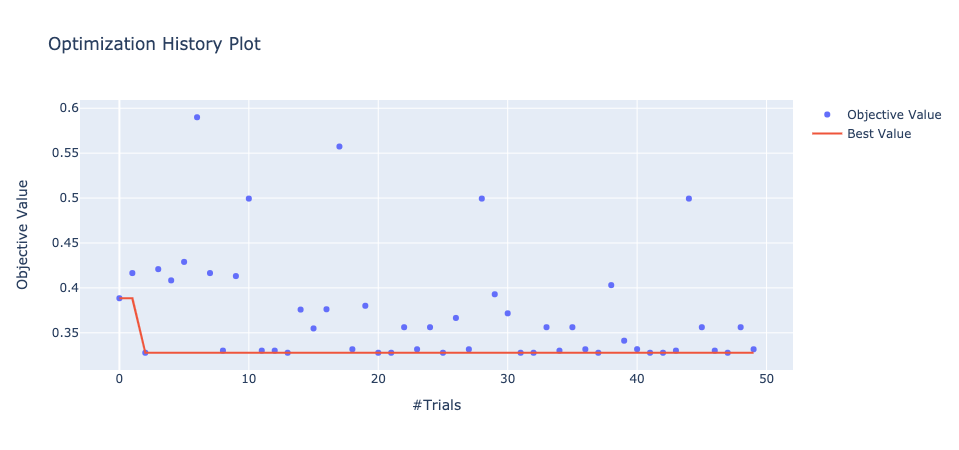

In [70]:
optuna.visualization.plot_optimization_history(study)

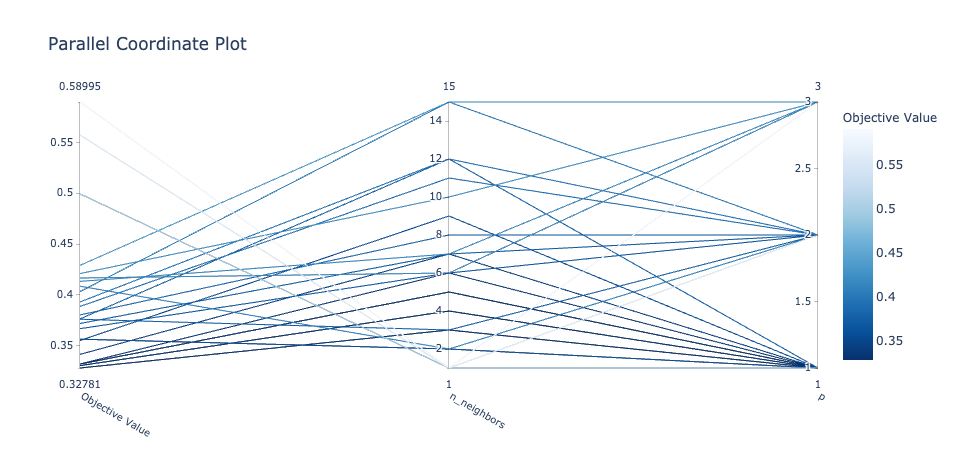

In [71]:
optuna.visualization.plot_parallel_coordinate(study)

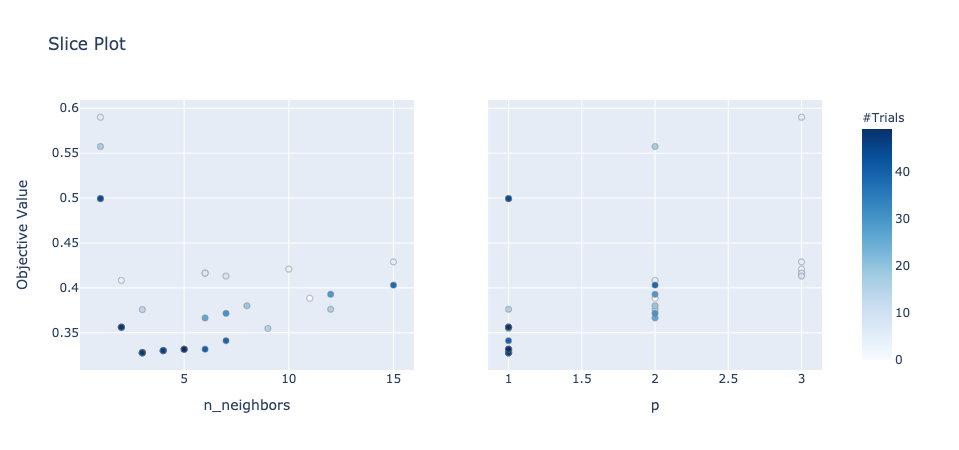

In [72]:
optuna.visualization.plot_slice(study)

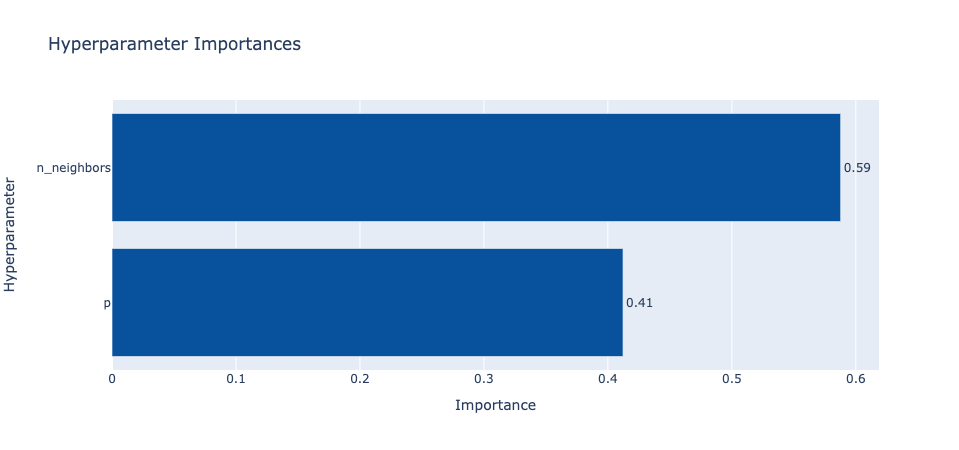

In [73]:
optuna.visualization.plot_param_importances(study)